In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
# Suppress warnings for clarity
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
from google.colab import files
uploaded = files.upload() # This will prompt you to upload the file in Colab
data = pd.read_csv("creditcard.csv")

Saving creditcard.csv to creditcard.csv


In [26]:
# Basic Exploration
print(data.head())
print(data.info())
print(data.describe())
print("Class Distribution:\n", data['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# Basic Exploratory Data Analysis (EDA)
# =============================================================================

print("Dataset Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("Missing Values:\n", data.isnull().sum())
print("\nDescriptive Statistics:\n", data.describe())


Dataset Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Descriptive Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   


In [27]:
# Data Preprocessing
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])

In [28]:
# Feature Engineering
# Creating transaction frequency & spending pattern features
data['Transaction_Frequency'] = data.groupby('Class')['Amount'].transform('count')
data['Spending_Avg'] = data.groupby('Class')['Amount'].transform('mean')

In [29]:
# Splitting Data
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [30]:
# Address Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [33]:
# Model Training and Evaluation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Import GradientBoostingClassifier

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [34]:
# Model Training and Evaluation
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"{name} ROC AUC Score:", roc_auc_score(y_test, y_prob))

Training Random Forest...

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00        98

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest Confusion Matrix:
 [[56864     0]
 [    0    98]]
Random Forest ROC AUC Score: 1.0
Training Gradient Boosting...

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      1.00      1.00        98

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962

Gradient Boosting Confusion Matrix:
 [[56864     0]
 [    0    98]]
Gradient Boosting ROC AUC Score: 1.0


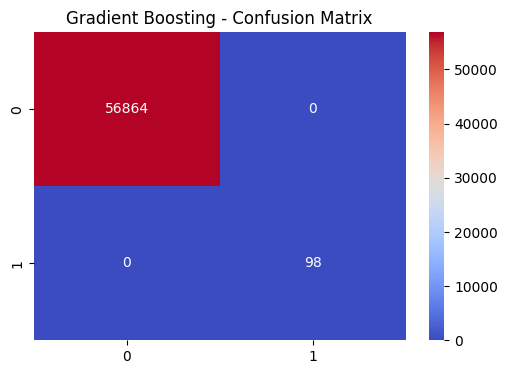

In [36]:
 # Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title(f"{name} - Confusion Matrix")
plt.show()

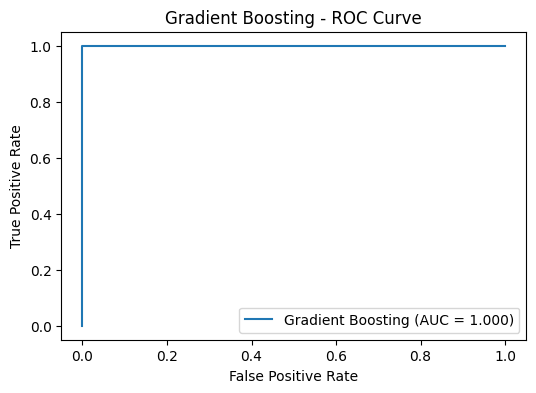

In [38]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.3f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"{name} - ROC Curve")
plt.legend()
plt.show()

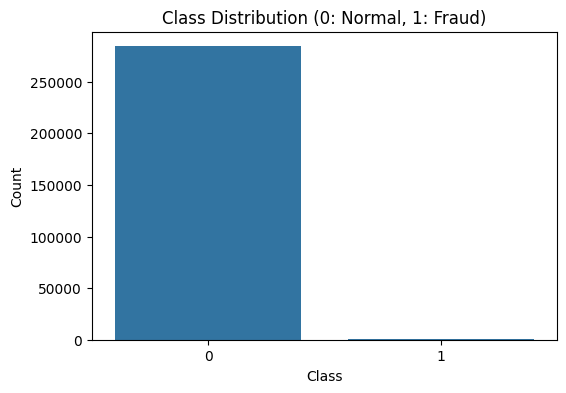

In [6]:
# Visualize class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0: Normal, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


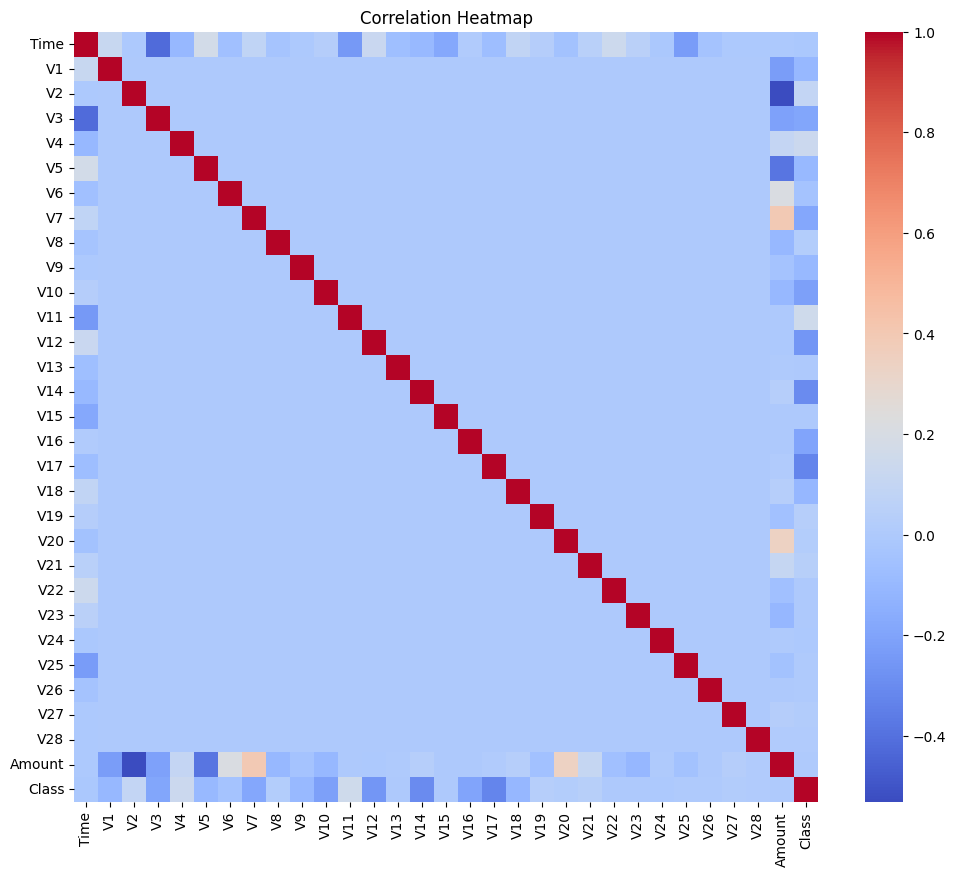

In [7]:
# Correlation heatmap for a subset of columns (avoid plotting the full matrix if too large)
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
# Standardize the 'Amount' feature and 'Time' if needed
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X['Amount_scaled'] = scaler.fit_transform(X[['Amount']])
X['Time_scaled'] = scaler.fit_transform(X[['Time']])


In [11]:
# Optionally, drop the original 'Amount' and 'Time' columns
X = X.drop(['Amount', 'Time'], axis=1)


In [12]:
# =============================================================================
# Splitting the Data into Train and Test sets
# =============================================================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (227845, 30)
Test set shape: (56962, 30)


In [13]:
# =============================================================================
# Handling Imbalanced Data using SMOTE
# =============================================================================

from imblearn.over_sampling import SMOTE

print("Before SMOTE, counts of label '1': {}".format(sum(y_train==1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train==0)))

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res==1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res==0)))

Before SMOTE, counts of label '1': 394
Before SMOTE, counts of label '0': 227451 

After SMOTE, counts of label '1': 227451
After SMOTE, counts of label '0': 227451


In [17]:
# =============================================================================
# Model Training & Evaluation Function
# =============================================================================

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
    else:
        # For models like SVM (if probability not enabled)
        y_proba = model.decision_function(X_test)

    print(f"----- {model_name} Evaluation -----")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score: {:.4f}\n".format(auc))

    # Plot ROC Curve inside the function
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc='lower right')
    plt.show()

----- Logistic Regression Evaluation -----
Confusion Matrix:
[[55403  1461]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC AUC Score: 0.9699



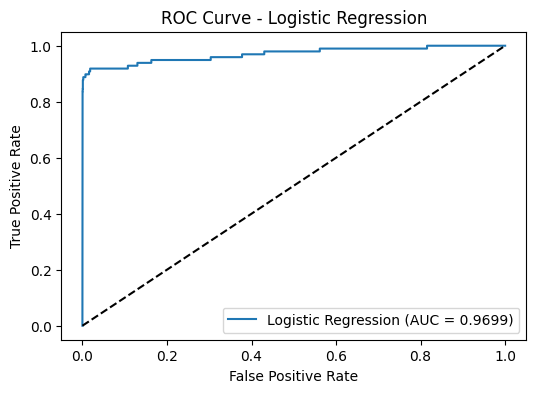

In [18]:
# =============================================================================
# Model 1: Logistic Regression
# =============================================================================

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train_res, y_train_res)
evaluate_model(lr, X_test, y_test, "Logistic Regression")


----- XGBoost Evaluation -----
Confusion Matrix:
[[56832    32]
 [   11    87]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9792



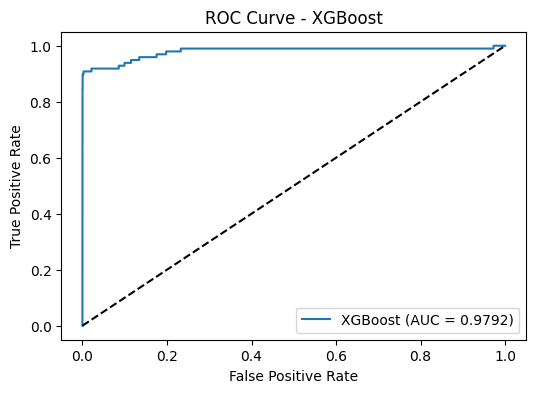

In [21]:

# =============================================================================
# Model 2: XGBoost Classifier
# =============================================================================

import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_res, y_train_res)
evaluate_model(xgb_clf, X_test, y_test, "XGBoost")